In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
df = pd.DataFrame({'x1': [1,1,0,0],'x2': [1,0,1,0]})
df['xor'] = df.apply(lambda x: int(x['x1']+x['x2'] == 1), axis=1)
X = df.values[:,0:2]
y = np.expand_dims(df.values[:,2], axis=1)

In [3]:
np.random.seed(100)

model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=2,name='First-layer' ))
model.add(Dense(1, activation='sigmoid',name='Output-layer'))

model.compile(loss='binary_crossentropy',
        optimizer=SGD(0.1),
        metrics=['accuracy'])

In [4]:
history = model.fit(X, y, epochs=1000, verbose=0, batch_size = 1)
loss_and_metrics = model.evaluate(X, y)
df['prediction_prob'] = model.predict(X)
print("Accuracy: ",loss_and_metrics[1])

4/4 [==============================] - 0s 3ms/step
Accuracy:  1.0


In [5]:
print(df)

   x1  x2  xor  prediction_prob
0   1   1    0         0.001115
1   1   0    1         0.997851
2   0   1    1         0.998501
3   0   0    0         0.014211


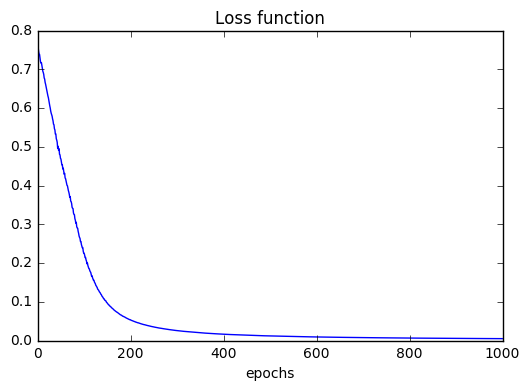

In [6]:
plt.plot(history.history['loss'])
plt.title("Loss function")
plt.xlabel("epochs")
plt.show()

In [7]:
from keras.utils import plot_model
plot_model(model, to_file='images/model.png')

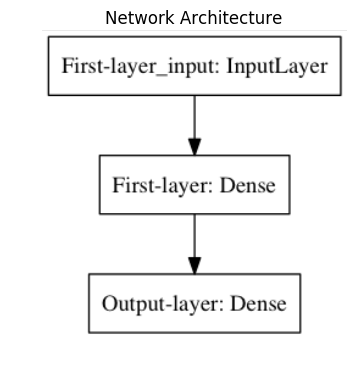

In [8]:
import matplotlib.image as mpimg
img=mpimg.imread('images/model.png')
fig, ax = plt.subplots()
ax.axis('off')
imgplot = plt.imshow(img)
plt.title("Network Architecture")
plt.show()